In [1]:
import torch
from data import Data, data_smoothing
from plot import plot_output
from torch.utils.data import DataLoader

In [2]:
# If you haven't trained a model yet, please go to the file 'baryons_train.ipynb' first!
model = torch.load('./baryon_model_200gev.pt')
model.eval()

BaryonModel(
  (linear): Linear(in_features=141, out_features=141, bias=True)
)

In [18]:
dataset = Data('NetbaryonDis_OSG3DAuAu200_tune18.6_wBulk_22momdeltaf_wHBT') + Data('3DAuAu200_minimumbias_BG16_tune17')

data_loader = DataLoader(
    dataset=dataset,
    shuffle=True
)

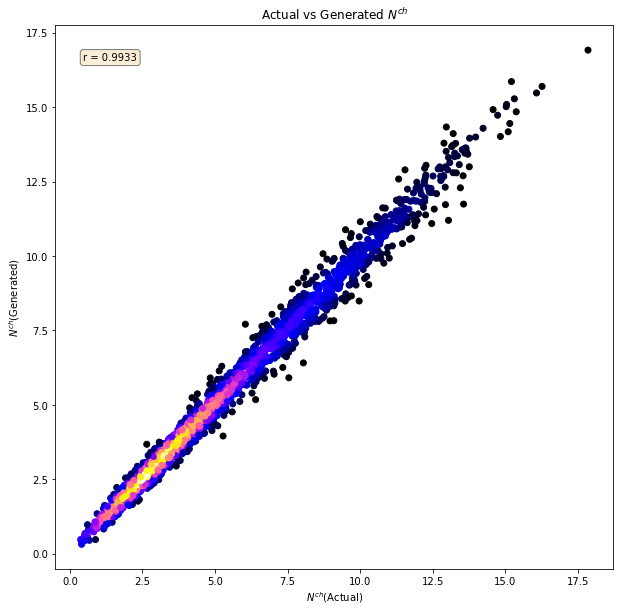

In [19]:
finals = []
models = []
bound_1 = -1
bound_2 = 1

import utils
import plot
import numpy as np

for i, data in enumerate(data_loader):
    #if i > 5: break

    baryons = data[0]
    protons = data[1].flatten()
    output = model(baryons.float())

    baryon_eta_trim, baryon_trim = utils.trim( dataset.final_eta, protons, bound_1, bound_2  )
    _, output_trim = utils.trim( dataset.final_eta, output.detach().numpy().flatten(), bound_1, bound_2  )

    finals.append( np.trapz( baryon_trim, x=baryon_eta_trim ) )
    models.append( np.trapz( output_trim, x=baryon_eta_trim ) )

    #plot_output(dataset.final_eta, protons, output.detach().numpy().flatten())

plot.plot_cc_graph(np.array(finals), np.array(models))